# 1. Autoencoder

In [1]:
import numpy as np
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as tfk
tfkl = tfk.layers

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
x_train = (x_train/255).astype('float32')
x_test = (x_test/255).astype('float32')

In [ ]:
autoencoder = tfk.Sequential()
autoencoder.add(tfkl.Conv2D(filters = 32, kernel_size=3, strides=1, 
                      padding="same", activation='relu', input_shape=(32,32,3)))
autoencoder.add(tfkl.BatchNormalization())
autoencoder.add(tfkl.Conv2D(filters = 32, kernel_size=3, strides=2, 
                      padding="same", activation='relu'))
autoencoder.add(tfkl.Conv2D(filters = 32, kernel_size=3, strides=1, 
                      padding="same", activation='relu'))
autoencoder.add(tfkl.BatchNormalization())
autoencoder.add(tfkl.UpSampling2D())
autoencoder.add(tfkl.Conv2D(filters = 32, kernel_size=3, strides=1, 
                      padding="same", activation='relu'))
autoencoder.add(tfkl.BatchNormalization())
autoencoder.add(tfkl.Conv2D(3,kernel_size=1, strides=1, padding='same', activation='sigmoid'))
autoencoder.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_42 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_43 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
up_sampling2d_20 (UpSampling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 32, 32, 32)      

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
results1 = autoencoder.fit(x_train,x_train,epochs=20,steps_per_epoch=10,batch_size=1000)

Epoch 1/20
10/10 [==============================] - 40s 4s/step - loss: 0.6584 - accuracy: 0.4033
Epoch 2/20
10/10 [==============================] - 40s 4s/step - loss: 0.5832 - accuracy: 0.5045
Epoch 3/20
10/10 [==============================] - 40s 4s/step - loss: 0.5701 - accuracy: 0.5518
Epoch 4/20
10/10 [==============================] - 40s 4s/step - loss: 0.5651 - accuracy: 0.5955
Epoch 5/20
10/10 [==============================] - 40s 4s/step - loss: 0.5622 - accuracy: 0.6351
Epoch 6/20
10/10 [==============================] - 40s 4s/step - loss: 0.5597 - accuracy: 0.6648
Epoch 7/20
10/10 [==============================] - 40s 4s/step - loss: 0.5586 - accuracy: 0.6866
Epoch 8/20
10/10 [==============================] - 40s 4s/step - loss: 0.5579 - accuracy: 0.7038
Epoch 9/20
10/10 [==============================] - 40s 4s/step - loss: 0.5558 - accuracy: 0.7169
Epoch 10/20
10/10 [==============================] - 40s 4s/step - loss: 0.5552 - accuracy: 0.7224
Epoch 11/20
10/10 [

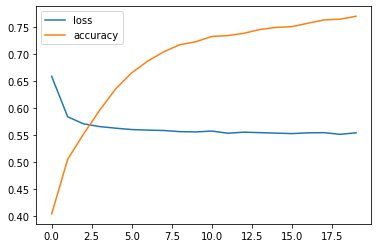

In [ ]:
plt.plot(results1.history['loss'])
plt.plot(results1.history['accuracy'])
plt.legend(labels=['loss','accuracy'])

In [ ]:
new_img = autoencoder.predict(x_test)

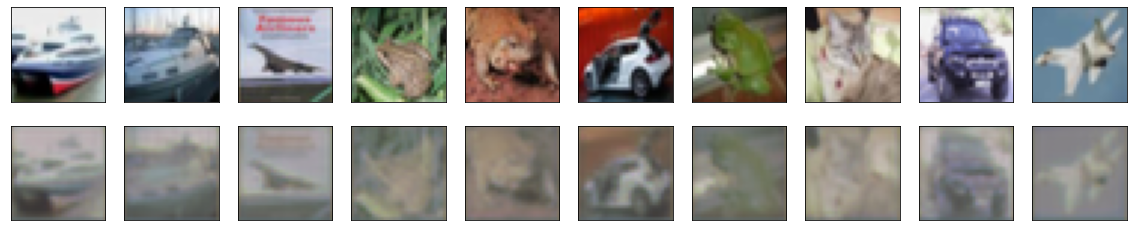

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # plot orginal image
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot predict image
    ax = plt.subplot(2, n, i + n)
    plt.imshow(new_img[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 2.1 Deep CNN


In [ ]:
tf.one_hot(y_train,depth=10)

<tf.Tensor: shape=(50000, 1, 10), dtype=float32, numpy=
array([[[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 1.]],

       [[0., 0., 0., ..., 0., 0., 1.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 1.]],

       [[0., 1., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.]]], dtype=float32)>

In [ ]:
model1 = tfk.Sequential()
model1.add(tfkl.Conv2D(64,kernel_size=(3,3),strides=1,input_shape=(32,32,3),padding='valid',activation='relu'))
model1.add(tfkl.MaxPool2D(pool_size=(2,2)))
model1.add(tfkl.Dropout(0.3))
model1.add(tfkl.Conv2D(32,kernel_size=(3,3),strides=1,padding='valid',activation='relu'))
model1.add(tfkl.MaxPool2D(pool_size=(2,2)))
model1.add(tfkl.Dropout(0.3))
model1.add(tfkl.Flatten())
model1.add(tfkl.Dense(64,activation='relu'))
model1.add(tfkl.Dropout(0.5))
model1.add(tfkl.Dense(10,activation='softmax'))
model1.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_54 (Dropout)         (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1152)            

In [ ]:
# In this model, I choose the kernel size is (3,3) and the strides=1,padding is valid, and the depth is 7.

In [ ]:
model1.compile(optimizer=tfk.optimizers.RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.utils import to_categorical

In [ ]:
train_label = to_categorical(y_train)

In [ ]:
test_label = to_categorical(y_test)

In [ ]:
results2 = model1.fit(x_train,train_label,steps_per_epoch=100,epochs=20,batch_size=16,validation_data=(x_test,test_label))

Epoch 1/20
100/100 [==============================] - 8s 80ms/step - loss: 2.2861 - accuracy: 0.1244 - val_loss: 2.2824 - val_accuracy: 0.1139
Epoch 2/20
100/100 [==============================] - 8s 79ms/step - loss: 2.1949 - accuracy: 0.1850 - val_loss: 2.1137 - val_accuracy: 0.2279
Epoch 3/20
100/100 [==============================] - 8s 79ms/step - loss: 2.0646 - accuracy: 0.2262 - val_loss: 1.9521 - val_accuracy: 0.3045
Epoch 4/20
100/100 [==============================] - 8s 80ms/step - loss: 2.0183 - accuracy: 0.2469 - val_loss: 1.9163 - val_accuracy: 0.3205
Epoch 5/20
100/100 [==============================] - 7s 74ms/step - loss: 1.9446 - accuracy: 0.2781 - val_loss: 1.8537 - val_accuracy: 0.3454
Epoch 6/20
100/100 [==============================] - 7s 74ms/step - loss: 1.8719 - accuracy: 0.2937 - val_loss: 1.7521 - val_accuracy: 0.3657
Epoch 7/20
100/100 [==============================] - 8s 83ms/step - loss: 1.8818 - accuracy: 0.3150 - val_loss: 1.6907 - val_accuracy: 0.4069

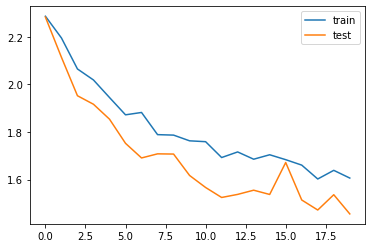

In [ ]:
plt.plot(results2.history['loss'])
plt.plot(results2.history['val_loss'])
plt.legend(labels=['train','test'])

# 2.2 Transfer learning

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (32,32,3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
model2 = tfk.Sequential()
model2.add(conv_base)
model2.add(tfkl.Flatten())
model2.add(tfkl.Dense(64, activation='relu'))
model2.add(tfkl.Dropout(0.5))
model2.add(tfkl.Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_10 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                32832     
_________________________________________________________________
dropout_57 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                650       
Total params: 14,748,170
Trainable params: 14,748,170
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv_base.trainable = False
len(model2.trainable_weights)

4

In [ ]:
model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
results3 = model2.fit(x_train, train_label, epochs=5, batch_size=32,validation_data=(x_test,test_label))

Epoch 1/5
1563/1563 [==============================] - 646s 413ms/step - loss: 1.3509 - accuracy: 0.5393 - val_loss: 1.2507 - val_accuracy: 0.5733
Epoch 2/5
1563/1563 [==============================] - 646s 413ms/step - loss: 1.3601 - accuracy: 0.5412 - val_loss: 1.2539 - val_accuracy: 0.5732
Epoch 3/5
1563/1563 [==============================] - 646s 413ms/step - loss: 1.3671 - accuracy: 0.5422 - val_loss: 1.2620 - val_accuracy: 0.5761
Epoch 4/5
1563/1563 [==============================] - 646s 413ms/step - loss: 1.3662 - accuracy: 0.5465 - val_loss: 1.2743 - val_accuracy: 0.5773
Epoch 5/5
1563/1563 [==============================] - 645s 413ms/step - loss: 1.3732 - accuracy: 0.5469 - val_loss: 1.2713 - val_accuracy: 0.5799


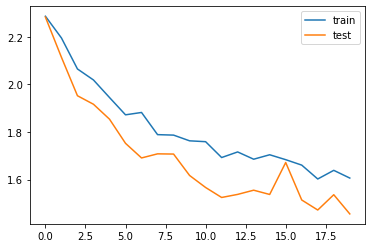

In [ ]:
plt.plot(results2.history['loss'])
plt.plot(results2.history['val_loss'])
plt.legend(labels=['train','test'])

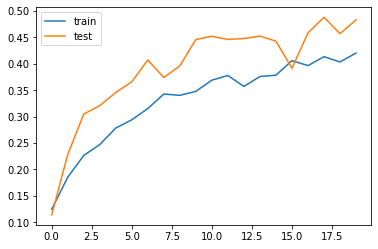

In [ ]:
plt.plot(results2.history['accuracy'])
plt.plot(results2.history['val_accuracy'])
plt.legend(labels=['train','test'])

# 3. Text classification

In [4]:
import pandas as pd

In [5]:
spam = pd.read_csv('SPAM_detection.csv')

In [8]:
spam

,Message,category_val
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [12]:
x = spam['Message']
y = spam['category_val']

In [ ]:
x=np.asarray(x)
y=np.asarray(y)

In [24]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [17]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

In [90]:
vocab_size = len(tokenizer.word_index)+1

In [18]:
sequences = tokenizer.texts_to_sequences(x)

In [94]:

data = pad_sequences(sequences,padding='post')

In [95]:
np.random.seed(2020)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

In [96]:
data = data[indices]
labels = y[indices]

In [97]:
i = int(5572*0.8)

In [98]:
x_train = data[:i]
y_train = labels[:i]
x_test = data[i:]
y_test = labels[i:]

In [100]:
x_train.shape

(4457, 189)

In [104]:
model3 = tfk.Sequential()
model3.add(tfkl.Embedding(vocab_size, 16, input_length=189))
model3.add(tfkl.LSTM(128,return_sequences=True))
model3.add(tfkl.GlobalMaxPool1D())
model3.add(tfkl.Dropout(0.4))
model3.add(tfkl.Dense(64,activation="relu"))
model3.add(tfkl.Dropout(0.4))
model3.add(tfkl.Dense(1,activation="sigmoid"))
model3.compile(loss='binary_crossentropy', optimizer=tfk.optimizers.RMSprop(lr=0.01),metrics=['accuracy'])
model3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 189, 16)           144080    
_________________________________________________________________
lstm_8 (LSTM)                (None, 189, 128)          74240     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [106]:
results3 = model3.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,steps_per_epoch=20,batch_size=32)

Epoch 1/20
20/20 [==============================] - 6s 289ms/step - loss: 0.4591 - accuracy: 0.8406 - val_loss: 0.3589 - val_accuracy: 0.8592
Epoch 2/20
20/20 [==============================] - 5s 266ms/step - loss: 0.2768 - accuracy: 0.8797 - val_loss: 0.1716 - val_accuracy: 0.9489
Epoch 3/20
20/20 [==============================] - 5s 270ms/step - loss: 0.3137 - accuracy: 0.9000 - val_loss: 0.2193 - val_accuracy: 0.9417
Epoch 4/20
20/20 [==============================] - 5s 268ms/step - loss: 0.2056 - accuracy: 0.9391 - val_loss: 0.1728 - val_accuracy: 0.9534
Epoch 5/20
20/20 [==============================] - 5s 270ms/step - loss: 0.1248 - accuracy: 0.9547 - val_loss: 0.1693 - val_accuracy: 0.9543
Epoch 6/20
20/20 [==============================] - 5s 270ms/step - loss: 0.1111 - accuracy: 0.9641 - val_loss: 0.0766 - val_accuracy: 0.9821
Epoch 7/20
20/20 [==============================] - 5s 266ms/step - loss: 0.1274 - accuracy: 0.9741 - val_loss: 0.0773 - val_accuracy: 0.9767
Epoch 

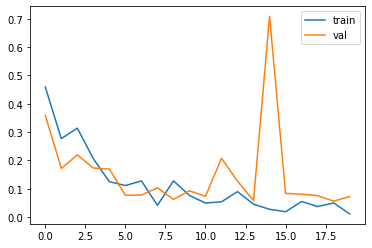

In [107]:
plt.plot(results3.history["loss"])
plt.plot(results3.history["val_loss"])
plt.legend(labels=["train", "val"])

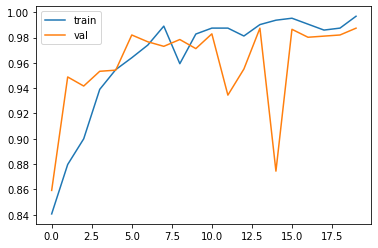

In [110]:
plt.plot(results3.history["accuracy"])
plt.plot(results3.history["val_accuracy"])
plt.legend(labels=["train", "val"])